In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Квадратная область
Решим уравнение Пуассона в квадрате $[0,1]^2$ с нулевыми граничными условиями

In [61]:
x_min = 0.
x_max = 1.
nx = 100
y_min = 0.
y_max = 1.
ny = 100
h = (x_max - x_min)/nx

Источник возьмём поприкольнее:
$$
f(x,y) = \text{Exp}(-5(x-\frac{1}{4})^2-5(y-\frac{1}{4})^2)\cdot\text{Sin}(10x+20y)
$$

In [93]:
x = np.linspace(x_min, x_max, nx)
y = np.linspace(y_min, y_max, ny)
xg, yg = np.meshgrid(x,y)
f= np.exp(- 5*(xg-0.25)**2 - 2*(yg-0.25)**2)*(1+np.sin(10*xg+20*yg))

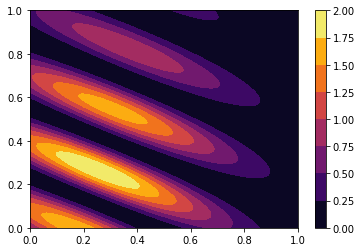

In [94]:
fig = plt.figure()
plt.contourf(x,y,f, cmap=plt.cm.inferno)
plt.colorbar()
plt.show()

Будем решать "крестом" на равномерной сетке c шагом h:

$$
\Delta u \approx \dfrac{u_{i+1,j} + u_{i-1,j} + u_{i,j+1} + u_{i,j-1} -  4 u_{i,j}}{h^2}
$$

На каждой итерации будем выражать из него $x_{i,j}^{k+1}$, через $x_{i\pm 1,j\pm 1}^{k}$, после чего восстанавливать граничные условия

In [95]:
def solve(xg, yg, f, steps=100):
    u = np.zeros(xg.shape)
    fij = f[1:-1,1:-1]

    for i in range(steps):
        u_ip_j = u[1:-1,2:]
        u_im_j = u[1:-1,:-2]
        u_i_jp = u[2:,1:-1]
        u_i_jm = u[:-2,1:-1]

        u_kp = (u_ip_j + u_im_j + u_i_jp + u_i_jm)/4 - h * h * fij/4
        
        u[1:-1,1:-1] = u_kp
    
    return np.copy(u)

In [96]:
sol = []
ss = [1, 10, 100, 1000, 10000, 100000]
for s in ss:
    sol.append(solve(xg, yg, f, steps=s))

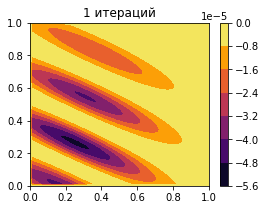

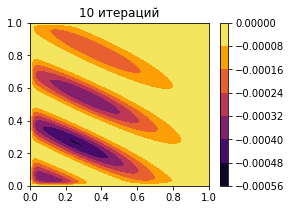

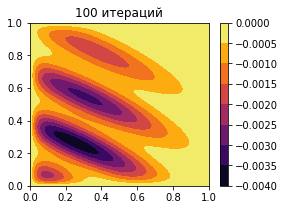

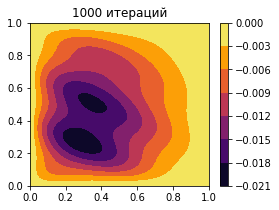

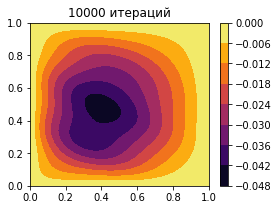

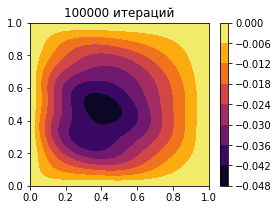

In [97]:
for i in range(0, 6):
    plt.figure(figsize=(4, 3))
    plt.contourf(x, y, sol[i], cmap=plt.cm.inferno)
    plt.colorbar()
    plt.title("{} итераций".format(ss[i]))
    plt.show()
plt.show()

In [98]:
print("1-норма разности решений с 10**5 и 10**6 итерациями равна", np.abs(sol[-1]-sol[-2]).max())

1-норма разности решений с 10**5 и 10**6 итерациями равна 0.00028724409605779266


### Круглая область

In [117]:
# Mask = np.array(((xg-0.5)**2 + (yg-0.5)**2) < 0.1)[1:-1,1:-1]
Mask = np.array(((xg-0.5)**2 + (yg-0.5)**2) < 0.1)

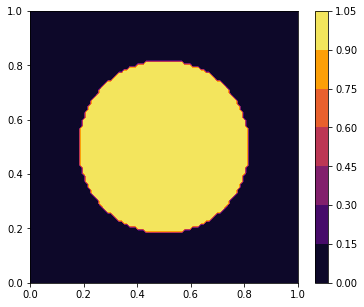

In [122]:
plt.figure(figsize=(6, 5))
plt.contourf(x, y, Mask, cmap=plt.cm.inferno)
plt.colorbar()
plt.show()

In [124]:
def solve_masked(xg, yg, f, Mask, u0=0, steps=100):
    if type(u0) == int:
        u0 = np.zeros(xg.shape)
    u = np.copy(u0)
    fij = f[1:-1,1:-1][Mask]

    for i in range(steps):
        u_ip_j = u[1:-1,2:][Mask]
        u_im_j = u[1:-1,:-2][Mask]
        u_i_jp = u[2:,1:-1][Mask]
        u_i_jm = u[:-2,1:-1][Mask]

        u_kp = (u_ip_j + u_im_j + u_i_jp + u_i_jm)/4 - h * h * fij/4
        
        u[1:-1,1:-1][Mask] = u_kp
    
    return np.copy(u)

In [127]:
Mask = Mask[1:-1,1:-1]
solc = solve_masked(xg, yg, f, Mask, steps=30000)

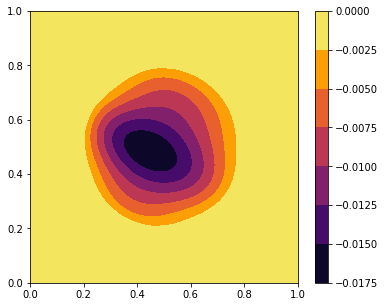

In [128]:
plt.figure(figsize=(6, 5))
plt.contourf(x, y, solc, cmap=plt.cm.inferno)
plt.colorbar()
plt.show()

### Кубические кривые

с другой функцией

In [250]:
x_min = 0.
x_max = 10.
nx = 100
y_min = 0.
y_max = 10.
ny = 100
h = (x_max - x_min)/nx
x = np.linspace(x_min, x_max, nx)
y = np.linspace(y_min, y_max, ny)
xg, yg = np.meshgrid(x,y)
f= 100 * np.exp(-(xg-4)**2/100 - (yg-5)**2/10)

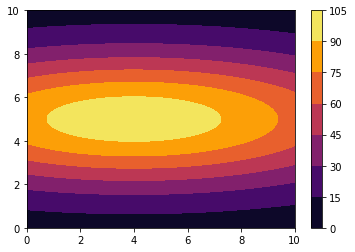

In [251]:
fig = plt.figure()
plt.contourf(x,y,f, cmap=plt.cm.inferno)
plt.colorbar()
plt.show()

Теперь пусть область неодносвязна, и вообще ограничена двумя кубическими кривыми

In [252]:
Mask2 = np.logical_or(np.array((((xg-4)**3 + (yg-2)**2) < 1)), np.array(-(xg-6)*3+(yg-8)**2 < 1))

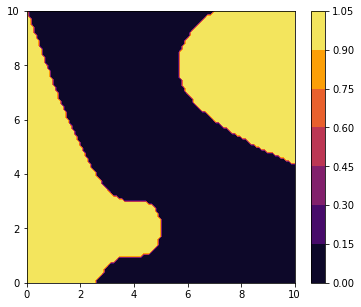

In [253]:
plt.figure(figsize=(6, 5))
plt.contourf(x, y, Mask2, cmap=plt.cm.inferno)
plt.colorbar()
plt.show()

In [254]:
Mask2 = Mask2[1:-1,1:-1]
solc3 = solve_masked(xg, yg, f, Mask2, u0=0, steps=10000)
solc3[1:-1,1:-1][Mask2 != True] = 0
solc3[:1, :] = 0
solc3[-1:, :] = 0
solc3[:, :1] = 0
solc3[:, -1:] = 0

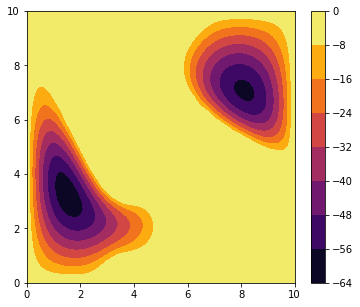

In [255]:
plt.figure(figsize=(6, 5))
plt.contourf(x, y, solc3, cmap=plt.cm.inferno)
plt.colorbar()
plt.show()

Верю!